<a href="https://colab.research.google.com/github/SaidurIUT/Simulation/blob/main/SimulationLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
---

Implement an RNG function to produce a single pseudorandom number that follows a uniform distribution between 0 and 1. You can use any RNG algorithm (e.g.
Middle-square method, Linear congruential generator)



In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Congruential Generator class
class LinearCongruentialGenerator:
    def __init__(self, seed=42):
        self.modulus = 2**32
        self.a = 1664525
        self.c = 1013904223
        self.state = seed

    def random(self):
        self.state = (self.a * self.state + self.c) % self.modulus
        return (self.state / self.modulus)

# Instantiate the RNG
lcg = LinearCongruentialGenerator(seed=123)

# Generate random numbers
num_samples = 100000
uniform_random_numbers = [lcg.random() for _ in range(num_samples)]

# Print the generated random numbers
for num in uniform_random_numbers[:100]:  # Printing first 100 numbers as sample
    print(num)



0.2837369213812053
0.4351300236303359
0.03865125775337219
0.22087990469299257
0.3594270762987435
0.5902441388461739
0.361280900426209
0.3268499083351344
0.07973951241001487
0.6479622528422624
0.6049802396446466
0.9694624783005565
0.7677612067200243
0.9586836213711649
0.0909308111295104
0.8444633211474866
0.5457009929232299
0.18131351214833558
0.10987668111920357
0.7187079151626676
0.5285541121847928
0.7696523650083691
0.8389335284009576
0.06742957676760852
0.4523370764218271
0.6081990145612508
0.700780538842082
0.9624840894248337
0.06501784408465028
0.0629929753486067
0.6183601124212146
0.10219589504413307
0.8582663084380329
0.9631207894999534
0.8682103827595711
0.12343084788881242
0.9681500983424485
0.2785114368889481
0.48555554915219545
0.586520530981943
0.32290069153532386
0.5096458077896386
0.4242790210992098
0.27366313501261175
0.3658748404122889
0.05480523803271353
0.9249043753370643
0.6914258997421712
0.9318363103084266
0.07048410666175187
0.7937091253697872
0.9179741179104894
0

# Task 2
---
Show that the generated random numbers follow a uniform distribution by plotting a histogram. Recommended tools - Matplotlib on Google Colab, MATLAB Online.


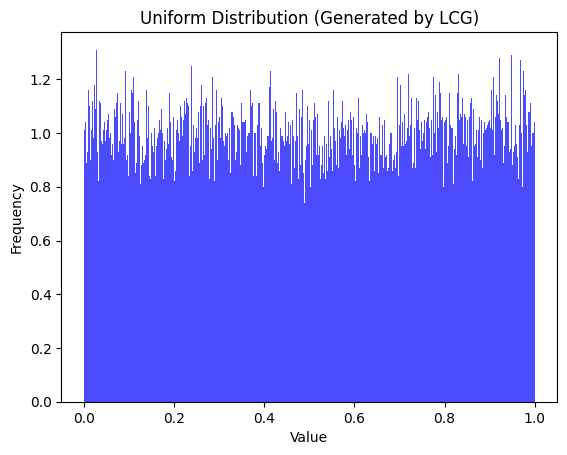

In [20]:
# Plot the histogram to show the uniform distribution
plt.hist(uniform_random_numbers, bins=1000, density=True, alpha=0.7, color='blue')
plt.title('Uniform Distribution (Generated by LCG)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


# Task 3
---
Using your RNG function generate and visualize three different non-uniform distributions.

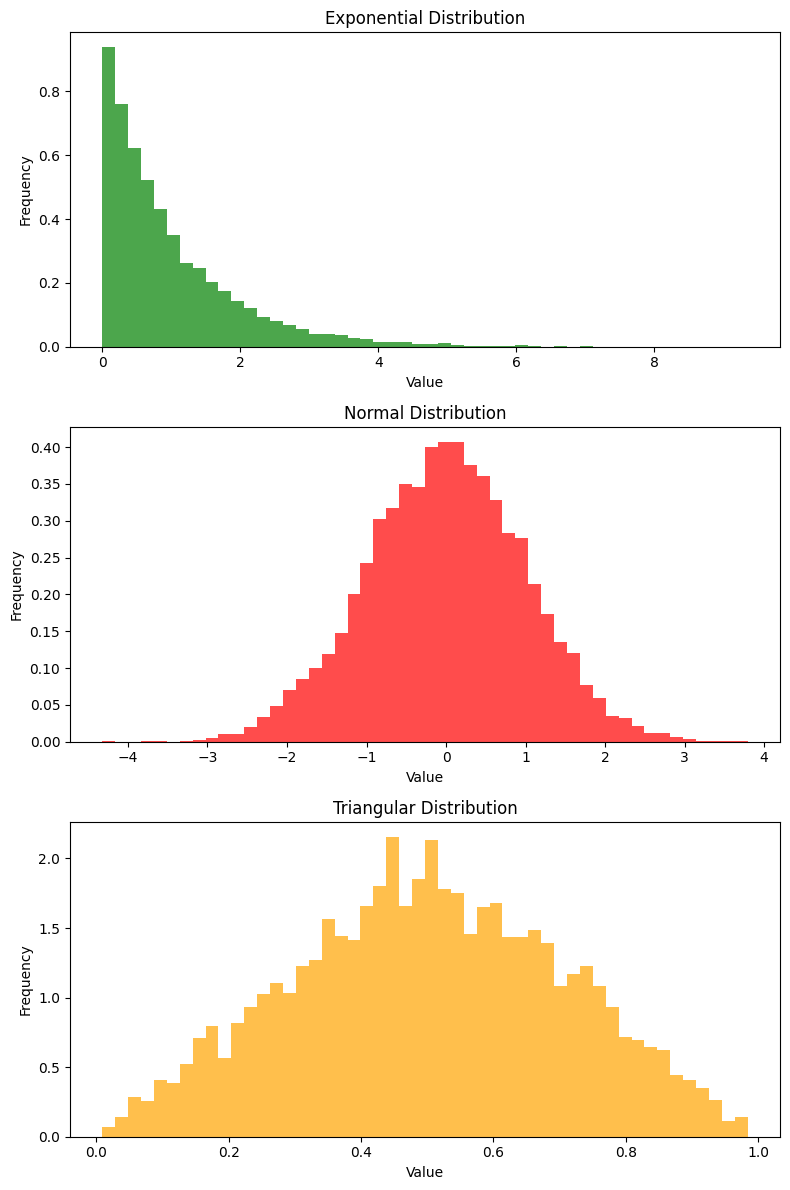

In [11]:
# Exponential distribution: X = -lambda * ln(U)
def exponential_distribution(lmbda, uniform_random_numbers):
    return [-lmbda * np.log(u) for u in uniform_random_numbers]

# Normal distribution using Box-Muller transform
def normal_distribution(mean, stddev, uniform_random_numbers):
    normal_random_numbers = []
    for i in range(0, len(uniform_random_numbers), 2):
        u1 = uniform_random_numbers[i]
        u2 = uniform_random_numbers[i+1]
        z0 = np.sqrt(-2.0 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z1 = np.sqrt(-2.0 * np.log(u1)) * np.sin(2 * np.pi * u2)
        normal_random_numbers.append(mean + z0 * stddev)
        normal_random_numbers.append(mean + z1 * stddev)
    return normal_random_numbers

# Triangular distribution: sum of two uniform random variables
def triangular_distribution(uniform_random_numbers):
    return [(uniform_random_numbers[i] + uniform_random_numbers[i+1]) / 2 for i in range(0, len(uniform_random_numbers), 2)]

# Generate non-uniform random numbers
exp_random_numbers = exponential_distribution(1.0, uniform_random_numbers)
normal_random_numbers = normal_distribution(0, 1, uniform_random_numbers)
triangular_random_numbers = triangular_distribution(uniform_random_numbers)

# Plot the non-uniform distributions
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Exponential distribution
axs[0].hist(exp_random_numbers, bins=50, density=True, alpha=0.7, color='green')
axs[0].set_title('Exponential Distribution')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Normal distribution
axs[1].hist(normal_random_numbers, bins=50, density=True, alpha=0.7, color='red')
axs[1].set_title('Normal Distribution')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

# Triangular distribution
axs[2].hist(triangular_random_numbers, bins=50, density=True, alpha=0.7, color='orange')
axs[2].set_title('Triangular Distribution')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
